In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dimension_reduction
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
from tabulate import tabulate
import eval_metrics
import graphviz
from sklearn import tree
# import pydotplus
from sklearn import metrics
import learning_curve
import cross_validation
import pickle
import oversampling

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,SEQN,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Health_cond,Diabetes,Difficulty Hearing,Difficulty Seeing,Drug Addict,Hepatitis_B,Hepatitis_C,hospitalized,days_hospitalised,Weak Kidney,Dialysis,Kidney Stone,Pesticide_used,asthma,asthma_current,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,current_chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,UACR
0,83736,2,42,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,83739,1,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,83745,2,15,0,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,83746,2,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,83748,1,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [4]:
data.drop('SEQN', axis=1, inplace=True)

In [5]:
def show_value_counts(data):
    for column in data.columns:
        unique_values = data[column].nunique()
        if unique_values > 3:
            print(f"Column: {column}")
            print(data[column].value_counts())
            print("\n")

In [6]:
show_value_counts(data)

Column: Age
80    552
4     243
5     211
3     196
63    142
     ... 
33     34
24     30
30     30
25     27
21     23
Name: Age, Length: 78, dtype: int64


Column: Health_cond
3.0    1848
4.0    1336
2.0     914
1.0     310
5.0     278
Name: Health_cond, dtype: int64


Column: days_hospitalised
0.0    5254
1.0     611
2.0     233
3.0      84
6.0      23
5.0      15
4.0       1
Name: days_hospitalised, dtype: int64




In [7]:
def get_missing_val_count_df(df):
    missing_values = df.isnull().sum()
    missing_df = pd.DataFrame({'Feature_with_missing_value': missing_values.index, 'Missing_values': missing_values.values})
    return missing_df[missing_df['Missing_values'] > 0]

In [8]:
msdf = get_missing_val_count_df(data)
msdf

,Feature_with_missing_value,Missing_values
4,current_drinker,1568
5,former_drinker_x,1568
6,current_smoker,1177
7,former_drinker_y,1177
8,Aspirin_use,2448
9,High_Blood_pressure,1426
10,High_Cholestrol,1426
11,Chest_pain,2448
16,Health_cond,1535
20,Drug Addict,2903


In [9]:
missing_column_names = msdf['Feature_with_missing_value'].tolist()

In [10]:
data.shape

(6221, 74)

In [11]:
y = data['UACR']
X = data.drop(columns=['UACR'])

In [12]:
X.shape, y.shape

((6221, 73), (6221,))

In [13]:
# Lets impute missing values using knn Imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
X = imputer.transform(X)
X.shape

(6221, 73)

In [14]:
X_columns = data.iloc[:, :-1]  # Select all columns except the last one
X = pd.DataFrame(X, columns=X_columns.columns)

In [15]:
X.shape

(6221, 73)

In [16]:
def process_columns(df, column_names):
    for column_name in column_names:
        for i in range(df.shape[0]):
            if df.loc[i, column_name] < 0.5:
                df.loc[i, column_name] = 0
            else:
                df.loc[i, column_name] = 1

In [17]:
process_columns(X, missing_column_names)

In [18]:
X.isna().sum().sum()# no missing values

0

In [19]:
X.shape, y.shape

((6221, 73), (6221,))

In [20]:
X_os,y_os = oversampling.oversample_data(X, y, method='adasyn', sampling_strategy=0.75)

In [21]:
X_os.shape, y_os.shape

((9005, 73), (9005,))

In [22]:
X_significant = dimension_reduction.get_p_values_significant_features(X_os,y_os)

**************************************************
significant features
**************************************************
                         Feature_name       p-Value
0                         Weak Kidney  1.184322e-37
1                            Diabetes  2.267145e-33
2                    former_drinker_x  1.208988e-20
3                        heart attack  1.476603e-19
4                 Prescribed_medicine  2.177909e-15
5                              Gender  6.282047e-15
6                        Kidney Stone  9.744479e-13
7     4-fluoro-3-phenoxy-benzoic acid  2.017623e-11
8                       Oxypyrimidine  2.475633e-10
9            congestive heart failure  2.843584e-09
10                          arthritis  8.510535e-09
11                               gout  1.010918e-08
12                             Farmer  1.516831e-08
13                       Clothianidin  3.728009e-08
14               Diethylthiophosphate  3.299236e-07
15                         glyphosate  4.0625

In [23]:
X_rfe = dimension_reduction.dim_red_using_rfe(X_significant, y_os, 30)

In [24]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_rfe, y_os, test_size=0.2, random_state=2)

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [26]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (5763, 30) (5763,)
validation data(X_valid,y_valid) shape:  (1441, 30) (1441,)
test data(X_test,y_test) shape:  (1801, 30) (1801,)


### Logistic Regression baseline model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
valid_predictions = model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, valid_predictions)
print("Validation Accuracy:", valid_accuracy)
test_predictions = model.predict(X_test)

Training Accuracy: 0.6500086760367864
Validation Accuracy: 0.630117973629424


C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
import pandas as pd
from tabulate import tabulate
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def lr_grid_search(C_values, penalty_values, solver_values, X_train, X_test, y_train, y_test):
    params = []
    for C_val in C_values:
        for penalty_val in penalty_values:
            for solver_val in solver_values:
                lr_model = LogisticRegression(C=C_val, penalty=penalty_val, solver=solver_val, random_state=2023)
                lr_model.fit(X_train, y_train)
                y_pred = lr_model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)
                F1_score = metrics.f1_score(y_test, y_pred, average='macro')
                precision = metrics.precision_score(y_test, y_pred, average='macro')
                recall = metrics.recall_score(y_test, y_pred, average='macro')
                parameters_dict = {'C': C_val, 'penalty': penalty_val, 'solver': solver_val, 'accuracy': accuracy, 'F1_score': F1_score, 'precision': precision, 'recall': recall}
                params.append(parameters_dict)
                print(f'C: {C_val}, penalty: {penalty_val}, solver: {solver_val}, accuracy: {accuracy}, F1_score: {F1_score}')

    return params

In [29]:
params = lr_grid_search([0.001, 0.01, 0.1, 1, 10], ['l1', 'l2'], ['liblinear'], X_train, X_test, y_train, y_test)
if params:
    # Sorting the metrics in descending order
    param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
    df = pd.DataFrame.from_dict(param_sorted)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    opt_hparams = param_sorted[0]
    print('**' * 60)
    print(f'\nOptimal hyper-parameters: {opt_hparams}\n')
    print('**' * 60)
else:
    print("No hyperparameters found.")

C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.001, penalty: l1, solver: liblinear, accuracy: 0.5685730149916713, F1_score: 0.36247787610619475
C: 0.001, penalty: l2, solver: liblinear, accuracy: 0.6024430871737924, F1_score: 0.5224778850198782
C: 0.01, penalty: l1, solver: liblinear, accuracy: 0.5663520266518601, F1_score: 0.3650908073241687
C: 0.01, penalty: l2, solver: liblinear, accuracy: 0.6396446418656302, F1_score: 0.6118427497702803
C: 0.1, penalty: l1, solver: liblinear, accuracy: 0.6357579122709606, F1_score: 0.6165587863398321
C: 0.1, penalty: l2, solver: liblinear, accuracy: 0.642976124375347, F1_score: 0.6263414344535898
C: 1, penalty: l1, solver: liblinear, accuracy: 0.6407551360355358, F1_score: 0.6256303097421188
C: 1, penalty: l2, solver: liblinear, accuracy: 0.6390893947806774, F1_score: 0.624155622335234
C: 10, penalty: l1, solver: liblinear, accuracy: 0.6413103831204886, F1_score: 0.6261218471948358
C: 10, penalty: l2, solver: liblinear, accuracy: 0.640199888950583, F1_score: 0.6247887715182987
+----+------

### cross Validation

In [31]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation
model_tuned = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear', random_state=2023)
model_tuned.fit(X_train_full, y_train_full)
cross_validation.cross_validation_func(model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.6471751402224557,
 'Mean Train Precision': 0.6060960361913285,
 'Mean Train Recall': 0.5279014484462108,
 'Mean Train F1 Score': 0.5642859010474003,
 'Mean Valid Accuracy': 64.15878248130156,
 'Mean Valid Precision': 0.5980044717832087,
 'Mean Valid Recall': 0.5240451496069474,
 'Mean Valid F1 Score': 0.5583910326667304}

### Testing Logistic Regression with optimal hyperparameters on unseen data

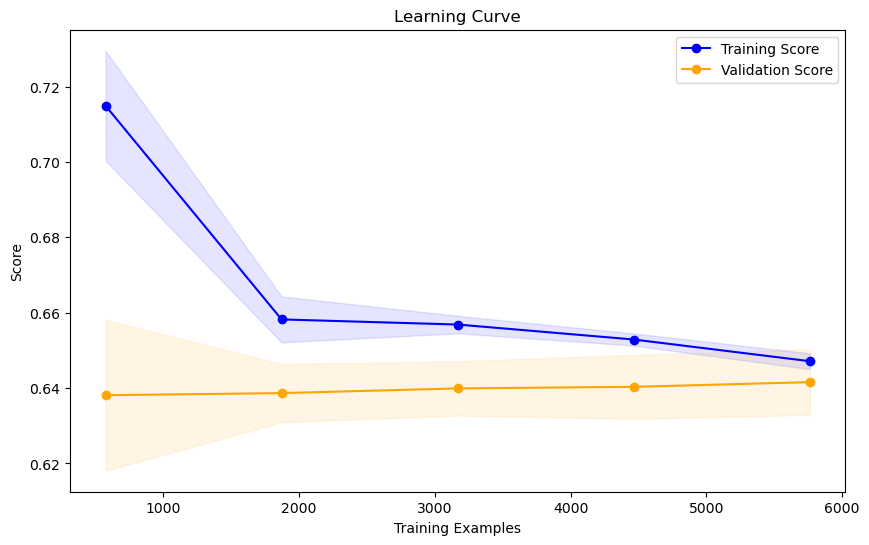

In [32]:
model_opt = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear',random_state=2023)
model_opt.fit(X_train_full, y_train_full)
y_pred_LR_opt = model.predict(X_test)
learning_curve.plot_learning_curve(model_opt, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70      1024
           1       0.60      0.51      0.55       777

    accuracy                           0.64      1801
   macro avg       0.63      0.63      0.63      1801
weighted avg       0.64      0.64      0.64      1801

Confusion Matrix:
 [[761 263]
 [379 398]]


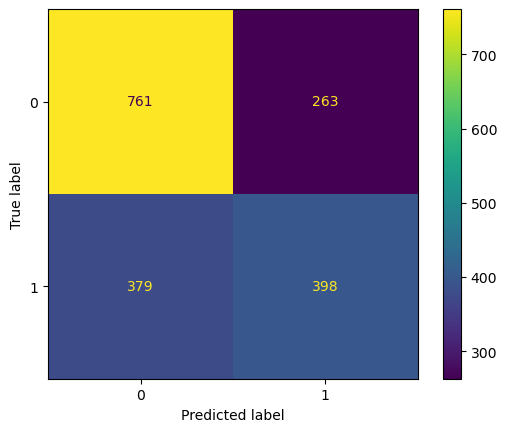

Accuracy: 0.6435313714602998
Precision: 0.6021180030257186
Recall: 0.5122265122265123
Sensitivity: 0.5122265122265123
Specificity: 0.7431640625
F1-Score: 0.5535465924895688
Cohen Kappa Score: 0.2600733116435989
G_measure: 0.5535465924895688
Informedness/Youdens statistic: 0.2553905747265124
PPV: 0.6021180030257186
NPV: 0.6675438596491228
Markedness: 0.2696618626748415
Matthews Correlation Coefficient 0.26242922491664217
ROC-AUC Score: 0.6276952873632562


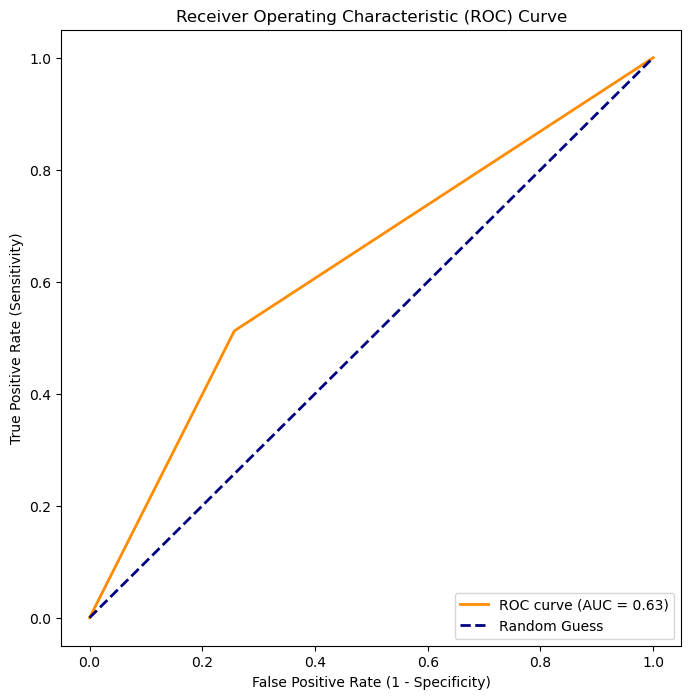

In [33]:
eval_metrics.metrics_calculation(y_test, y_pred_LR_opt, True)